# importing required libraries 

In [ ]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


# loading datasets

In [ ]:
data= pd.read_csv("Data.csv")
data.head()

,Unnamed: 0,review
0,0,excellent look
1,1,good product
2,2,nice dress
3,3,loved clothes
4,4,really product photo satisfied trust maintained


# Most frequent words in attribute Review

In [ ]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(30,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

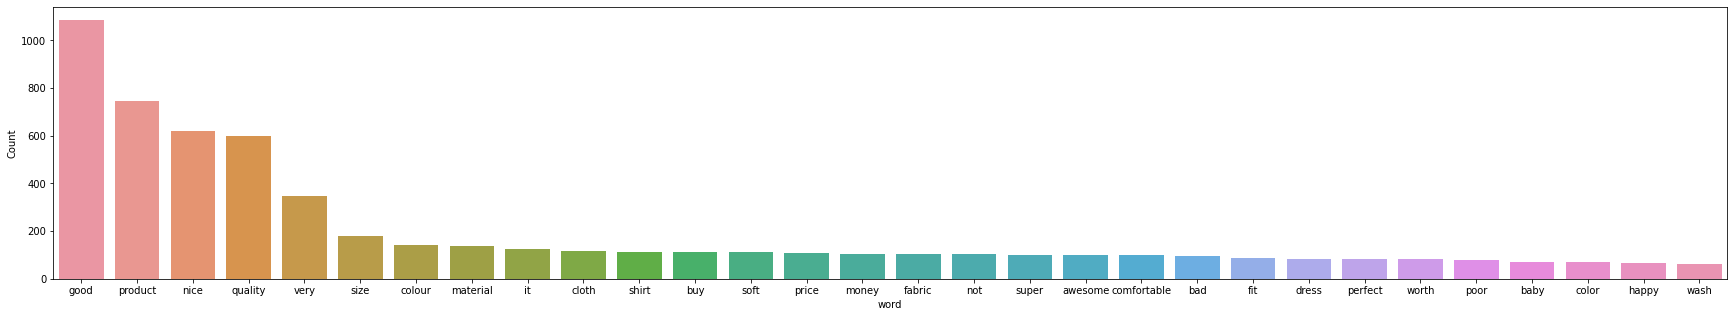

In [ ]:
freq_words(data['review'])

In [ ]:
data['review'] = data['review'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


# stopwords removal

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
data['review'] = data['review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in data['review']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

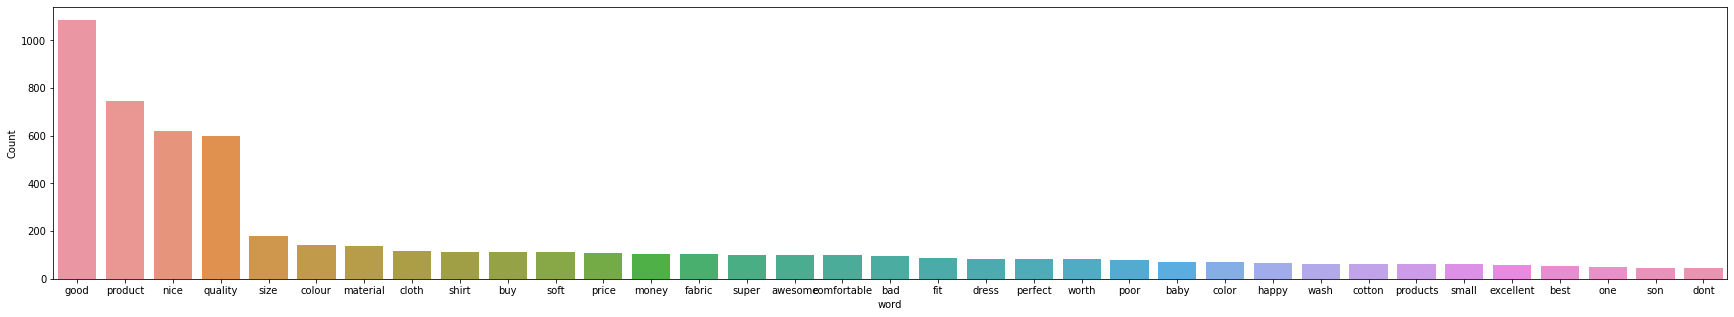

In [ ]:
freq_words(reviews, 35)

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


# Tokenisation

In [ ]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews)

0                                            [excellent, look]
1                                              [good, product]
2                                                [nice, dress]
3                                             [loved, clothes]
4       [really, product, photo, satisfied, trust, maintained]
                                 ...                          
2246                                              [cheapcheap]
2247                       [colour, faded, pic, colour, faded]
2248                                [bandit, tear, knee, side]
2249                                [size, small, size, small]
2250      [good, product, good, fit, good, product, good, fit]
Length: 2251, dtype: object


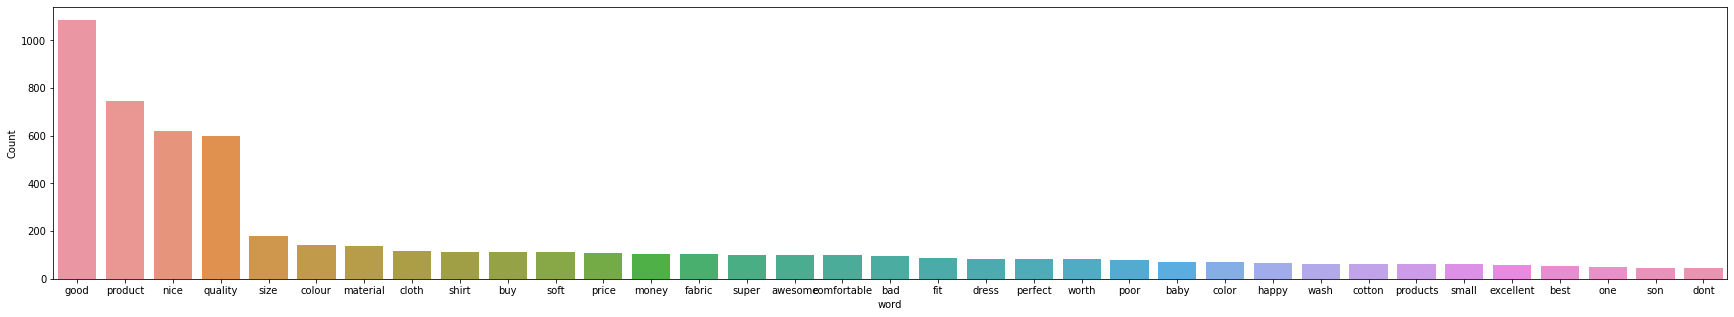

In [ ]:
reviews_3 = []
for i in range(len(tokenized_reviews)):
    reviews_3.append(' '.join(tokenized_reviews[i]))

data['reviews'] = reviews_3

freq_words(data['reviews'], 35)

In [ ]:
dictionary = corpora.Dictionary(tokenized_reviews)


In [ ]:
#texts = tokenized_reviews

In [ ]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

# Implementing LDA Topic modelling

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
 

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=20, random_state=100,
                chunksize=1000, passes=50)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

# Printing Topics

In [ ]:
lda_model.print_topics()

[(0,
  '0.384*"colour" + 0.068*"amazing" + 0.055*"faded" + 0.040*"bit" + 0.034*"long" + 0.031*"yrs" + 0.025*"stuff" + 0.016*"wear" + 0.014*"material" + 0.011*"little"'),
 (1,
  '0.154*"superb" + 0.145*"great" + 0.112*"beautiful" + 0.092*"design" + 0.038*"wearing" + 0.033*"fitted" + 0.024*"totally" + 0.023*"dark" + 0.019*"average" + 0.019*"okok"'),
 (2,
  '0.194*"size" + 0.139*"small" + 0.072*"stitching" + 0.054*"quality" + 0.042*"large" + 0.041*"order" + 0.033*"fit" + 0.022*"print" + 0.021*"better" + 0.019*"short"'),
 (3,
  '0.262*"quality" + 0.129*"poor" + 0.120*"bad" + 0.061*"dont" + 0.045*"material" + 0.044*"buy" + 0.043*"wash" + 0.027*"worst" + 0.025*"cheap" + 0.016*"low"'),
 (4,
  '0.257*"cloth" + 0.072*"quality" + 0.068*"average" + 0.056*"stars" + 0.045*"nicenice" + 0.029*"worst" + 0.028*"torn" + 0.021*"five" + 0.018*"set" + 0.018*"four"'),
 (5,
  '0.234*"dress" + 0.103*"good" + 0.069*"fitting" + 0.050*"baby" + 0.041*"perfectly" + 0.037*"fits" + 0.035*"image" + 0.030*"boys" + 0.0

# Topic Visualization

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.355906  0.084779       1        1  14.683774
15     0.224214 -0.302731       2        1   8.333068
3      0.134472  0.189253       3        1   7.517149
14     0.141439  0.092762       4        1   5.620853
2     -0.049620  0.129263       5        1   5.330417
19    -0.026930  0.075850       6        1   5.159511
17    -0.134601 -0.053806       7        1   5.013105
12     0.051108 -0.318547       8        1   4.728218
7     -0.152633  0.031345       9        1   4.635538
9     -0.124972 -0.030159      10        1   4.562058
4     -0.011773  0.105526      11        1   4.133669
18    -0.089754 -0.013520      12        1   3.969194
8     -0.109668 -0.021493      13        1   3.950581
5      0.090653  0.081159      14        1   3.893838
16     0.075744 -0.061254      15        1   3.686603
11     0.041346  0.051859      16        1   3.379081
0     -0.130055 -0.014036      17        1   3.377504
10    -0.115768 -0.056091      18        1   2.823911
6     -0.028241  0.056279      19        1   2.659767
1     -0.140867 -0.026437      20        1   2.542158, topic_info=              Term        Freq       Total Category  logprob  loglift
2             good  885.000000  885.000000  Default  30.0000  30.0000
5             nice  468.000000  468.000000  Default  29.0000  29.0000
3          product  634.000000  634.000000  Default  28.0000  28.0000
25         quality  546.000000  546.000000  Default  27.0000  27.0000
14          colour  146.000000  146.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
386           note    0.644358    1.464420  Topic20  -5.9914   2.8512
333         lately    0.644358    1.464420  Topic20  -5.9914   2.8512
994  uncomfortable    1.437882    3.685012  Topic20  -5.1887   2.7311
134        packing    0.644358    3.281751  Topic20  -5.9914   2.0443
40         average    4.859195   34.019118  Topic20  -3.9710   1.7261

[753 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
479       5  0.590289     accepted
479      10  0.295144     accepted
1248      6  0.724325  accordingly
1258     11  0.877627       action
1278      7  0.558186       actual
...     ...       ...          ...
256       9  0.719883       yellow
294       1  0.905087          yes
1037      7  0.938144          yet
31       17  0.895965          yrs
31       19  0.081451          yrs

[789 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 16, 4, 15, 3, 20, 18, 13, 8, 10, 5, 19, 9, 6, 17, 12, 1, 11, 7, 2])

# Coherence Score and plots

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

In [ ]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.502092264023399


In [ ]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.502092264023399


In [ ]:
def compute_coherence_values(dictionary, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel( id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

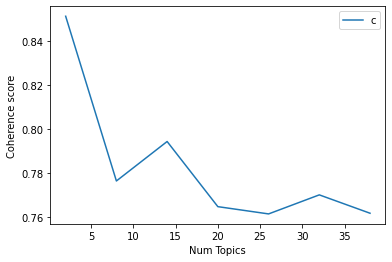

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, texts=tokenized_reviews, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()